<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab 3_01: Statistical Modeling and Model Validation

> Authors: Tim Book, Matt Brems

---

## Objective
The goal of this lab is to guide you through the modeling workflow to produce the best model you can. In this lesson, you will follow all best practices when slicing your data and validating your model. 

## Imports

In [364]:
# Import everything you need here.
# You may want to return to this cell to import more things later in the lab.
# DO NOT COPY AND PASTE FROM OUR CLASS SLIDES!
# Muscle memory is important!
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import time
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from scipy import stats
import statsmodels.api as sm

## Read Data
The `citibike` dataset consists of Citi Bike ridership data for over 224,000 rides in February 2014.

In [365]:
# Read in the citibike data in the data folder in this repository.
citibike_feb2014=pd.read_csv('./data/citibike_feb2014.csv')

## Explore the data
Use this space to familiarize yourself with the data.

Convince yourself there are no issues with the data. If you find any issues, clean them here.

In [366]:
citibike_feb2014.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991,1
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,15456,Subscriber,1979,2
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,16281,Subscriber,1948,2
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,17400,Subscriber,1981,1
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,19341,Subscriber,1990,1


In [367]:
citibike_feb2014.shape

(224736, 15)

In [368]:
citibike_feb2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224736 entries, 0 to 224735
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             224736 non-null  int64  
 1   starttime                224736 non-null  object 
 2   stoptime                 224736 non-null  object 
 3   start station id         224736 non-null  int64  
 4   start station name       224736 non-null  object 
 5   start station latitude   224736 non-null  float64
 6   start station longitude  224736 non-null  float64
 7   end station id           224736 non-null  int64  
 8   end station name         224736 non-null  object 
 9   end station latitude     224736 non-null  float64
 10  end station longitude    224736 non-null  float64
 11  bikeid                   224736 non-null  int64  
 12  usertype                 224736 non-null  object 
 13  birth year               224736 non-null  object 
 14  gend

In [369]:
#Convert to datetime Dtype
citibike_feb2014['starttime']=pd.to_datetime(citibike_feb2014['starttime'])
citibike_feb2014['stoptime']=pd.to_datetime(citibike_feb2014['stoptime'])
citibike_feb2014['starttime'].head()

0   2014-02-01 00:00:00
1   2014-02-01 00:00:03
2   2014-02-01 00:00:09
3   2014-02-01 00:00:32
4   2014-02-01 00:00:41
Name: starttime, dtype: datetime64[ns]

In [370]:
citibike_feb2014['stoptime'].head()

0   2014-02-01 00:06:22
1   2014-02-01 00:06:15
2   2014-02-01 00:10:00
3   2014-02-01 00:10:15
4   2014-02-01 00:04:24
Name: stoptime, dtype: datetime64[ns]

In [371]:
citibike_feb2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224736 entries, 0 to 224735
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   tripduration             224736 non-null  int64         
 1   starttime                224736 non-null  datetime64[ns]
 2   stoptime                 224736 non-null  datetime64[ns]
 3   start station id         224736 non-null  int64         
 4   start station name       224736 non-null  object        
 5   start station latitude   224736 non-null  float64       
 6   start station longitude  224736 non-null  float64       
 7   end station id           224736 non-null  int64         
 8   end station name         224736 non-null  object        
 9   end station latitude     224736 non-null  float64       
 10  end station longitude    224736 non-null  float64       
 11  bikeid                   224736 non-null  int64         
 12  usertype        

In [372]:
citibike_feb2014['usertype'].unique()

array(['Subscriber', 'Customer'], dtype=object)

In [373]:
citibike_feb2014.describe(include='all')

<ipython-input-373-f1635c302b29>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  citibike_feb2014.describe(include='all')
<ipython-input-373-f1635c302b29>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  citibike_feb2014.describe(include='all')


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
count,224736.000000,224736,224736,224736.000000,224736,224736.000000,224736.000000,224736.000000,224736,224736.000000,224736.000000,224736.000000,224736,224736,224736.000000
unique,NaN,204437,204781,NaN,329,NaN,NaN,NaN,329,NaN,NaN,NaN,2,78,NaN
top,NaN,2014-02-11 08:50:10,2014-02-25 08:47:55,NaN,Lafayette St & E 8 St,NaN,NaN,NaN,Lafayette St & E 8 St,NaN,NaN,NaN,Subscriber,1985,NaN
freq,NaN,7,6,NaN,2920,NaN,NaN,NaN,2622,NaN,NaN,NaN,218019,9305,NaN
first,NaN,2014-02-01 00:00:00,2014-02-01 00:04:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2014-02-28 23:59:47,2014-03-02 13:51:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,874.519810,NaN,NaN,439.203479,NaN,40.734366,-73.990386,440.741995,NaN,40.734221,-73.990521,18010.598222,NaN,NaN,1.154617
std,5486.092219,NaN,NaN,335.723861,NaN,0.019031,0.011853,341.497433,NaN,0.019048,0.011920,1987.769335,NaN,NaN,0.436592
min,60.000000,NaN,NaN,72.000000,NaN,40.680342,-74.017134,72.000000,NaN,40.680342,-74.017134,14529.000000,NaN,NaN,0.000000
25%,360.000000,NaN,NaN,305.000000,NaN,40.721854,-73.998522,305.000000,NaN,40.721816,-73.999061,16302.000000,NaN,NaN,1.000000


In [374]:
citibike_feb2014['start station id'].unique()

array([ 294,  285,  247,  357,  401,  152,  325,  354,  375,  518,  501,
        388,  257,  477,  317,  527,  504,  316,  490,  450,  300,  474,
        540,  347,  499,  403,  237,  146,  497,  470,  355,  494,  496,
        143,  345,  368,  444,  493,  435,  229,  526,  372,  349,  488,
       2012,  476, 3002, 2021,  443,  351,  405,  280,  473,  319,  312,
        404,  384,  483,  446,  453,  116,  480,  157,  432,  410,  503,
        161,  326,  284,  336,  482,  441,  293,  394,  279,  417,  380,
        438,  254,  342,  505,  523,  252,  522,  463,  521,  528,  366,
        466,  485,  500,  334,  389,  434,  251,  519, 2002,  147,  449,
        402,  461,  308,  168,  418,  412,  242,  460,  364,  127,  236,
        508,  433,  263,  537,  352,  462,  531,  428,  291,  350,  495,
        492,  327,  545,  486,  307,  212,  223,  546,  469,  411,  515,
        423,  387,  297,  383,  478,  415,  396,  268,   83,  390,  324,
        310,  489,  358, 2008,  238,  262,  395,  3

In [375]:
citibike_feb2014['start station id'].value_counts()

293     2920
519     2719
497     2493
435     2403
521     2171
        ... 
431       54
278       45
443       41
2005      36
320        4
Name: start station id, Length: 329, dtype: int64

In [376]:
citibike_feb2014['start station name'].unique()

array(['Washington Square E', 'Broadway & E 14 St',
       'Perry St & Bleecker St', 'E 11 St & Broadway',
       'Allen St & Rivington St', 'Warren St & Church St',
       'E 19 St & 3 Ave', 'Emerson Pl & Myrtle Ave',
       'Mercer St & Bleecker St', 'E 39 St & 2 Ave',
       'FDR Drive & E 35 St', 'W 26 St & 10 Ave',
       'Lispenard St & Broadway', 'W 41 St & 8 Ave', 'E 6 St & Avenue B',
       'E 33 St & 1 Ave', '1 Ave & E 15 St', 'Fulton St & William St',
       '8 Ave & W 33 St', 'W 49 St & 8 Ave', 'Shevchenko Pl & E 6 St',
       '5 Ave & E 29 St', 'Lexington Ave & E 26 St',
       'W Houston St & Hudson St', 'Broadway & W 60 St', 'E 2 St & 2 Ave',
       'E 11 St & 2 Ave', 'Hudson St & Reade St', 'E 17 St & Broadway',
       'W 20 St & 8 Ave', 'Bayard St & Baxter St', 'W 26 St & 8 Ave',
       'E 16 St & 5 Ave', 'Clinton St & Joralemon St', 'W 13 St & 6 Ave',
       'Carmine St & 6 Ave', 'Broadway & W 24 St', 'W 45 St & 6 Ave',
       'W 21 St & 6 Ave', 'Great Jones St', 'E 3

In [377]:
citibike_feb2014['start station name'].value_counts()

Lafayette St & E 8 St         2920
Pershing Square N             2719
E 17 St & Broadway            2493
W 21 St & 6 Ave               2403
8 Ave & W 31 St               2171
                              ... 
Hanover Pl & Livingston St      54
Concord St & Bridge St          45
Bedford Ave & S 9th St          41
Railroad Ave & Kay Ave          36
Church St & Leonard St           4
Name: start station name, Length: 329, dtype: int64

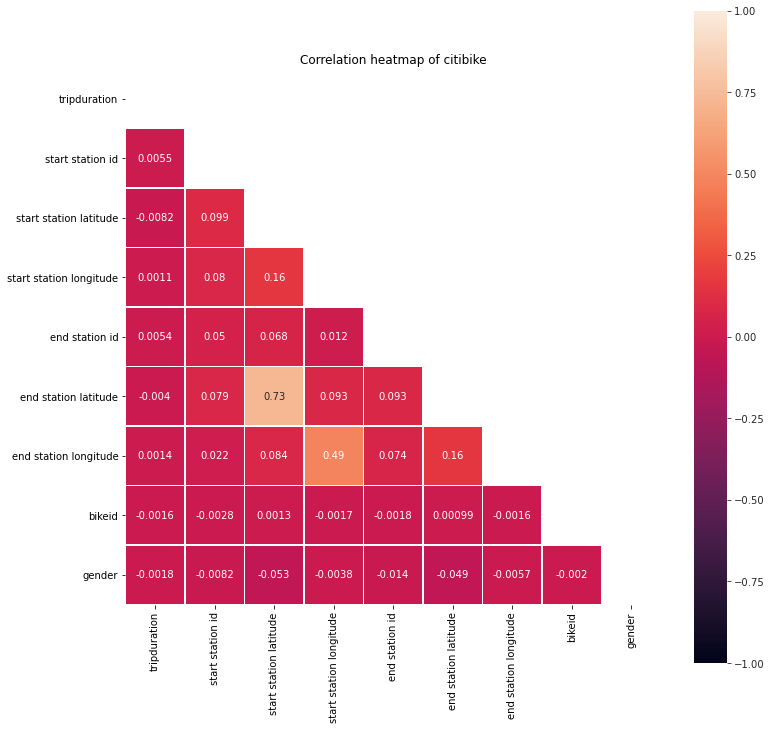

In [378]:
plt.figure(figsize=(12,12))
plt.title('Correlation heatmap of citibike')

# Get correlation of variables. (statistical significance)
corr = citibike_feb2014.corr()

# Set up mask to be "True" in the upper triangle.
# because it will be the mirror image of lower triangle we'll see on our plot.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5)

In [379]:
#plt.figure(figsize=(20,20))
#sns.pairplot(citibike_feb2014);

## Is average trip duration different by gender?

Conduct a hypothesis test that checks whether or not the average trip duration is different for `gender=1` and `gender=2`. Be sure to specify your null and alternative hypotheses, and to state your conclusion carefully and correctly!

In [380]:
citibike_feb2014['tripduration']

0          382
1          372
2          591
3          583
4          223
          ... 
224731     848
224732    1355
224733     304
224734     308
224735     603
Name: tripduration, Length: 224736, dtype: int64

In [381]:
citibike_feb2014['gender'].value_counts()

1    176526
2     41479
0      6731
Name: gender, dtype: int64

In [382]:
gender1=citibike_feb2014[citibike_feb2014['gender']==1]['tripduration']
gender2=citibike_feb2014[citibike_feb2014['gender']==2]['tripduration']
print(gender1)
print(gender2)

0         382
3         583
4         223
5         541
6         354
         ... 
224730    175
224731    848
224733    304
224734    308
224735    603
Name: tripduration, Length: 176526, dtype: int64
1          372
2          591
9          439
18         292
19         259
          ... 
224695     604
224698     606
224701     340
224727    1210
224732    1355
Name: tripduration, Length: 41479, dtype: int64


In [383]:
print(gender1.mean())
print(gender2.mean())
print(gender2.mean()-gender1.mean())

814.0324088236293
991.3610742785506
177.3286654549213


In [384]:
#Normality test of data
print(stats.normaltest(gender1))
print(stats.normaltest(gender2))

NormaltestResult(statistic=594557.0739898358, pvalue=0.0)
NormaltestResult(statistic=141232.27647663627, pvalue=0.0)


In [385]:
# 2-Sample t hypothesis test
alpha = 0.05
t_stat, p_value = stats.ttest_ind(gender1,gender2)
if p_value<alpha:
    print('There is statistically significant difference between gender 1 & gender 2')
elif p_value>alpha:
    print('There is no statistical difference between gender 1 & gender 2')

There is statistically significant difference between gender 1 & gender 2


## What numeric columns shouldn't be treated as numeric?

**Answer:**

## Dummify the `start station id` Variable

In [386]:
citibike_feb2014=pd.get_dummies(data=citibike_feb2014, columns=["start station id"],drop_first=True)

## Engineer a feature called `age` that shares how old the person would have been in 2014 (at the time the data was collected).

- Note: you will need to clean the data a bit.

In [387]:
citibike_feb2014=citibike_feb2014[citibike_feb2014['birth year']!=citibike_feb2014['birth year'][31]]
citibike_feb2014.head()

,tripduration,starttime,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,...,start station id_2006,start station id_2008,start station id_2009,start station id_2010,start station id_2012,start station id_2017,start station id_2021,start station id_2022,start station id_2023,start station id_3002
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,...,0,0,0,0,0,0,0,0,0,0
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,...,0,0,0,0,0,0,0,0,0,0
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,...,0,0,0,0,0,0,0,0,0,0
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,...,0,0,0,0,0,0,0,0,0,0
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,...,0,0,0,0,0,0,0,0,0,0


In [388]:
citibike_feb2014['birth year']=citibike_feb2014['birth year'].astype(int)

In [389]:
citibike_feb2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218019 entries, 0 to 224735
Columns: 342 entries, tripduration to start station id_3002
dtypes: datetime64[ns](2), float64(4), int64(5), object(3), uint8(328)
memory usage: 93.1+ MB


In [390]:
citibike_feb2014['age']=citibike_feb2014['stoptime'].dt.year-citibike_feb2014['birth year']
citibike_feb2014.head()

,tripduration,starttime,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,...,start station id_2008,start station id_2009,start station id_2010,start station id_2012,start station id_2017,start station id_2021,start station id_2022,start station id_2023,start station id_3002,age
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,...,0,0,0,0,0,0,0,0,0,23
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,...,0,0,0,0,0,0,0,0,0,35
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,...,0,0,0,0,0,0,0,0,0,66
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,...,0,0,0,0,0,0,0,0,0,33
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,...,0,0,0,0,0,0,0,0,0,24


In [391]:
citibike_feb2014.columns.values

array(['tripduration', 'starttime', 'stoptime', 'start station name',
       'start station latitude', 'start station longitude',
       'end station id', 'end station name', 'end station latitude',
       'end station longitude', 'bikeid', 'usertype', 'birth year',
       'gender', 'start station id_79', 'start station id_82',
       'start station id_83', 'start station id_116',
       'start station id_119', 'start station id_120',
       'start station id_127', 'start station id_128',
       'start station id_137', 'start station id_143',
       'start station id_144', 'start station id_146',
       'start station id_147', 'start station id_150',
       'start station id_151', 'start station id_152',
       'start station id_153', 'start station id_157',
       'start station id_160', 'start station id_161',
       'start station id_164', 'start station id_167',
       'start station id_168', 'start station id_173',
       'start station id_174', 'start station id_195',
       'sta

In [392]:
citibike_feb2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218019 entries, 0 to 224735
Columns: 343 entries, tripduration to age
dtypes: datetime64[ns](2), float64(4), int64(6), object(3), uint8(328)
memory usage: 94.8+ MB


In [393]:
citibike_feb2014['usertype'].unique()

array(['Subscriber'], dtype=object)

In [394]:
citibike_feb2014['usertype']=1
citibike_feb2014.head()

,tripduration,starttime,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,...,start station id_2008,start station id_2009,start station id_2010,start station id_2012,start station id_2017,start station id_2021,start station id_2022,start station id_2023,start station id_3002,age
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,...,0,0,0,0,0,0,0,0,0,23
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,...,0,0,0,0,0,0,0,0,0,35
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,...,0,0,0,0,0,0,0,0,0,66
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,...,0,0,0,0,0,0,0,0,0,33
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,...,0,0,0,0,0,0,0,0,0,24


## Split your data into train/test data

Look at the size of your data. What is a good proportion for your split? **Justify your answer.**

Use the `tripduration` column as your `y` variable.

For your `X` variables, use `age`, `usertype`, `gender`, and the dummy variables you created from `start station id`. (Hint: You may find the Pandas `.drop()` method helpful here.)

**NOTE:** When doing your train/test split, please use random seed 123.

In [395]:
y=citibike_feb2014['tripduration']
X=citibike_feb2014[['age','usertype','gender']+list(citibike_feb2014.columns.values[list(range(14,342))])]
print(X.shape)
X.head()

(218019, 331)


,age,usertype,gender,start station id_79,start station id_82,start station id_83,start station id_116,start station id_119,start station id_120,start station id_127,...,start station id_2006,start station id_2008,start station id_2009,start station id_2010,start station id_2012,start station id_2017,start station id_2021,start station id_2022,start station id_2023,start station id_3002
0,23,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,35,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,66,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,33,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,24,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [396]:
print(len(y))
y.head()

218019


0    382
1    372
2    591
3    583
4    223
Name: tripduration, dtype: int64

In [397]:
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
print(len(X_train), len(X_test))

163514 54505


## Fit a Linear Regression model in `sklearn` predicting `tripduration`.

In [398]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

## Evaluate your model
Look at some evaluation metrics for **both** the training and test data. 
- How did your model do? Is it overfit, underfit, or neither?
Underfit
- Does this model outperform the baseline? (e.g. setting $\hat{y}$ to be the mean of our training `y` values.)

In [399]:
# Train score
lr.score(X_train, y_train)

0.0033391119771174482

In [400]:
# Test score
lr.score(X_test, y_test)

-0.0017517830851612182

## Fit a Linear Regression model in `statsmodels` predicting `tripduration`.

In [417]:
res=sm.OLS(y_train,X_train).fit()

## Using the `statsmodels` summary, test whether or not `age` has a significant effect when predicting `tripduration`.
- Be sure to specify your null and alternative hypotheses, and to state your conclusion carefully and correctly **in the context of your model**!

In [419]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           tripduration   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.657
Date:                Fri, 05 Nov 2021   Prob (F-statistic):           6.52e-13
Time:                        01:53:14   Log-Likelihood:            -1.6373e+06
No. Observations:              163514   AIC:                         3.275e+06
Df Residuals:                  163183   BIC:                         3.279e+06
Df Model:                         330                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
age                       5.21

## Citi Bike is attempting to market to people who they think will ride their bike for a long time. Based on your modeling, what types of individuals should Citi Bike market toward?